In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2

2023-10-25 12:18:05.608218: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-25 12:18:05.633245: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-25 12:18:05.633271: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-25 12:18:05.633288: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-25 12:18:05.638175: I tensorflow/core/platform/cpu_feature_g

In [2]:
tf.config.list_physical_devices('GPU')

2023-10-25 12:18:06.641926: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-25 12:18:06.645321: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-25 12:18:06.645434: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
IMG_WIDTH = 384
IMG_HEIGHT = 384
IMG_CHANNELS = 3

## Dowloading the dataset from ROBOFLOW

In [4]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="4c6NVylOsFaXDSrcKDsZ")
# project = rf.workspace("uni-phtjr").project("floor-segmentation-huuot")
# dataset = project.version(1).download("png-mask-semantic")


# # Also you should move the classes file from each folder to one folder before

In [5]:
# dataset.location

In [6]:
TRAIN_PATH = '/home/luishuingo/semantics_segmentation/Floor-Segmentation-1/train/'
TEST_PATH = '/home/luishuingo/semantics_segmentation/Floor-Segmentation-1/test/'
VALID_PATH = '/home/luishuingo/semantics_segmentation/Floor-Segmentation-1/valid/'

X_train = np.zeros((len(os.listdir(TRAIN_PATH)), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(os.listdir(TRAIN_PATH)), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print('Resizing training images and masks')

for n, id_ in enumerate(os.listdir(TRAIN_PATH)):
    
    # Load and resize the training image
    img = cv2.imread(os.path.join(TRAIN_PATH, id_))  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if necessary
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the image
    X_train[n] = img

    # Load and resize the corresponding mask
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    mask_ = cv2.imread(os.path.join(TRAIN_PATH, id_.replace('.jpg', '_mask.png')), cv2.IMREAD_GRAYSCALE)  # Read the mask as grayscale
    mask_ = cv2.resize(mask_, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the mask
    mask_ = np.expand_dims(mask_, axis=-1)
    mask = np.maximum(mask, mask_)
    Y_train[n] = mask

# Now we do the same for the test set
X_test = np.zeros((len(os.listdir(TEST_PATH)), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(os.listdir(TEST_PATH)), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print('Resizing test images and masks')

for n, id_ in enumerate(os.listdir(TEST_PATH)):

    # Load and resize the training image
    img = cv2.imread(os.path.join(TEST_PATH, id_))  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if necessary
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the image
    X_test[n] = img

    # Load and resize the corresponding mask
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    mask_ = cv2.imread(os.path.join(TEST_PATH, id_.replace('.jpg', '_mask.png')), cv2.IMREAD_GRAYSCALE)  # Read the mask as grayscale
    mask_ = cv2.resize(mask_, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the mask
    mask_ = np.expand_dims(mask_, axis=-1)
    mask = np.maximum(mask, mask_)
    Y_test[n] = mask

# Now we do the same for the validation set

X_valid = np.zeros((len(os.listdir(VALID_PATH)), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_valid = np.zeros((len(os.listdir(VALID_PATH)), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print('Resizing validation images and masks')

for n, id_ in enumerate(os.listdir(VALID_PATH)):

    # Load and resize the training image
    img = cv2.imread(os.path.join(VALID_PATH, id_))  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if necessary
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the image
    X_valid[n] = img

    # Load and resize the corresponding mask
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    mask_ = cv2.imread(os.path.join(VALID_PATH, id_.replace('.jpg', '_mask.png')), cv2.IMREAD_GRAYSCALE)  # Read the mask as grayscale
    mask_ = cv2.resize(mask_, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the mask
    mask_ = np.expand_dims(mask_, axis=-1)
    mask = np.maximum(mask, mask_)
    Y_valid[n] = mask

Resizing training images and masks
Resizing test images and masks
Resizing validation images and masks


505
(384, 384, 3)
(384, 384, 1)


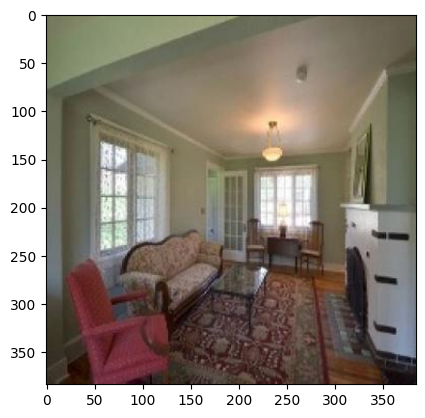

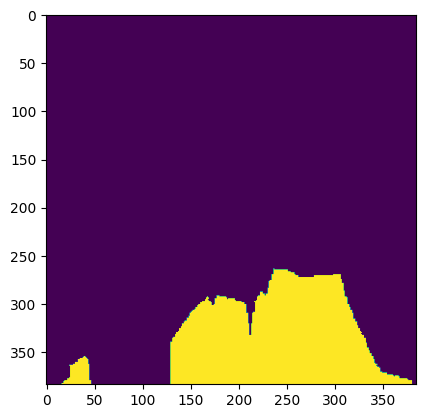

In [7]:
# Show a random training image and mask
import random
image_number = random.randint(0, len(X_train))
print(image_number)
print(X_train[image_number].shape)
print(Y_train[image_number].shape)
import matplotlib.pyplot as plt
plt.imshow(X_train[image_number])
plt.show()
plt.imshow(np.squeeze(Y_train[image_number]))
plt.show()


In [8]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 384, 384, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 384, 384, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 384, 384, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 384, 384, 16)         0         ['conv2d[0][0]']              
                                                                                              

2023-10-25 12:18:08.513798: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-25 12:18:08.513922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-25 12:18:08.513975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

                                                                                                  
 conv2d_11 (Conv2D)          (None, 48, 48, 128)          147584    ['dropout_5[0][0]']           
                                                                                                  
 conv2d_transpose_1 (Conv2D  (None, 96, 96, 64)           32832     ['conv2d_11[0][0]']           
 Transpose)                                                                                       
                                                                                                  
 concatenate_1 (Concatenate  (None, 96, 96, 128)          0         ['conv2d_transpose_1[0][0]',  
 )                                                                   'conv2d_5[0][0]']            
                                                                                                  
 conv2d_12 (Conv2D)          (None, 96, 96, 64)           73792     ['concatenate_1[0][0]']       
          

In [9]:
# Model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
              tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
              tf.keras.callbacks.TensorBoard(log_dir='logs')]


results = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=16, epochs=100, callbacks=callbacks,)


Epoch 1/100


2023-10-25 12:18:09.616008: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2023-10-25 12:18:09.616031: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2023-10-25 12:18:09.616046: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2023-10-25 12:18:09.616063: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas be

 1/43 [..............................] - ETA: 9:41 - loss: 0.7049 - accuracy: 0.5762

2023-10-25 12:18:23.531438: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



43/43 [==============================] - 25s 262ms/step - loss: 0.4226 - accuracy: 0.8477 - val_loss: 0.3244 - val_accuracy: 0.8667
Epoch 2/100
43/43 [==============================] - 8s 179ms/step - loss: 0.2392 - accuracy: 0.8788 - val_loss: 0.2359 - val_accuracy: 0.9238
Epoch 3/100
43/43 [==============================] - 8s 180ms/step - loss: 0.1809 - accuracy: 0.9319 - val_loss: 0.1816 - val_accuracy: 0.9180
Epoch 4/100
43/43 [==============================] - 8s 180ms/step - loss: 0.1347 - accuracy: 0.9453 - val_loss: 0.1644 - val_accuracy: 0.9295
Epoch 5/100
43/43 [==============================] - 8s 181ms/step - loss: 0.1194 - accuracy: 0.9496 - val_loss: 0.1513 - val_accuracy: 0.9320
Epoch 6/100
43/43 [==============================] - 8s 182ms/step - loss: 0.1146 - accuracy: 0.9522 - val_loss: 0.1263 - val_accuracy: 0.9492
Epoch 7/100
43/43 [==============================] - 8s 182ms/step - loss: 0.1101 - accuracy: 0.9541 - val_loss: 0.1236 - val_accuracy: 0.9500
Epoch 8/10

In [31]:
%pwd

'/home/luishuingo/semantics_segmentation'

In [30]:
# borramos la memoria de la GPU
from numba import cuda
cuda.select_device(0)
cuda.close()

In [11]:
# We are going to save the model
# model.save('unet_custome.h5')

In [12]:
# #############################################
idx = random.randint(0, len(X_train))

preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)
preds_test = model.predict(X_test, verbose=1)


# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


2/2 [==============================] - 0s 75ms/step


In [45]:
type(X_train)

numpy.ndarray

494
(384, 384, 3)
(384, 384, 1)


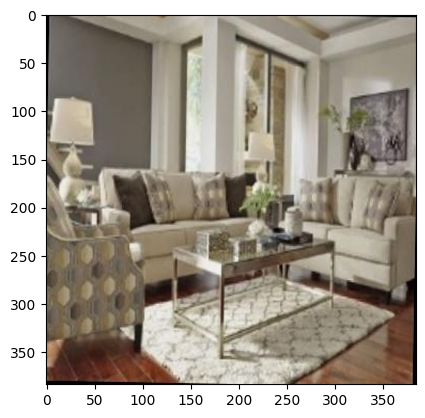

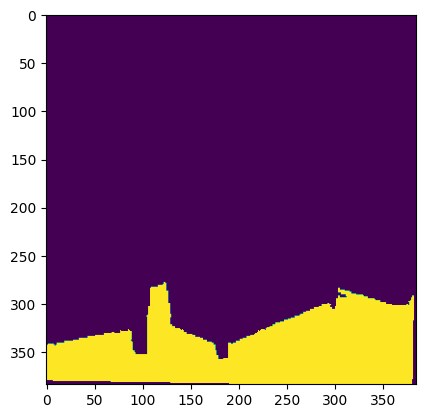

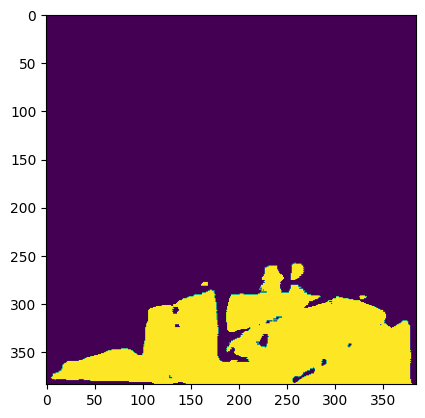

In [32]:
# Show a random prediction using OpenCV
image_number = random.randint(0, len(X_train))
print(image_number)
print(X_train[image_number].shape)
print(Y_train[image_number].shape)
import matplotlib.pyplot as plt
plt.imshow(X_train[image_number])
plt.show()
plt.imshow(np.squeeze(Y_train[image_number]))
plt.show()
plt.imshow(np.squeeze(preds_train_t[image_number]))
plt.show()


In [41]:
# Show if the camera is working
import cv2
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


[ WARN:0@18651.814] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@18651.814] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


error: OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [18]:
# Now we are going to use the webcam to test the model
from unittest import result
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

cap = cv2.VideoCapture(0)

while cap.isOpened():
    grabbed, frame = cap.read()

    if not grabbed:
        cap.release()
        cap = cv2.VideoCapture(0)
        cap.set(cv2.CAP_PROP_BUFFERSIZE, 1)
        continue

    else:
        print(frame.shape)
        result = model.predict(frame)
        result_t = (result > 0.5).astype(np.uint8)
        print(result_t)
        # cv2.imshow('frame', result_t[])

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()
    

[ WARN:0@2122.270] global cap_v4l.cpp:982 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@2122.270] global obsensor_uvc_stream_channel.cpp:156 getStreamChannelGroup Camera index out of range


error: OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [14]:
# # Perform a sanity check on some random validation samples
# ix = random.randint(0, len(preds_val_t))
# cv2.imshow("Image", X_valid[ix])
# cv2.imshow("Mask", np.squeeze(Y_valid[ix]))
# cv2.imshow("Predictions", np.squeeze(preds_val_t[ix]))
# cv2.waitKey(0)
# cv2.destroyAllWindows()